<a href="https://colab.research.google.com/github/VAbhishek12/excelr/blob/main/RandomForest/RF(Company_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: upload a file in colab

from google.colab import files

uploaded = files.upload()


Saving Company_Data.csv to Company_Data.csv


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("Company_Data.csv")
df.shape

(400, 11)

In [ ]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'CompPrice'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Advertising'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>, <Axes: >]], dtype=object)

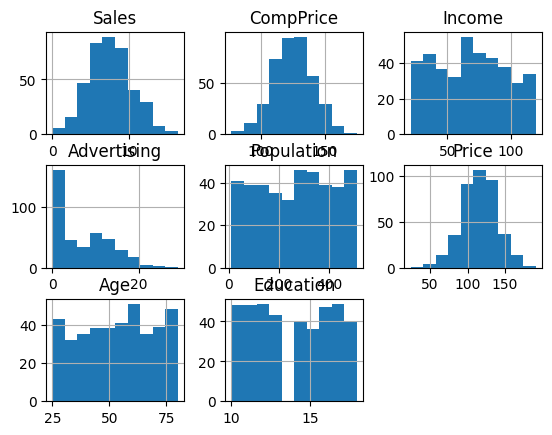

In [ ]:
# creating the histogram of all the variables...
df.hist()

<Axes: >

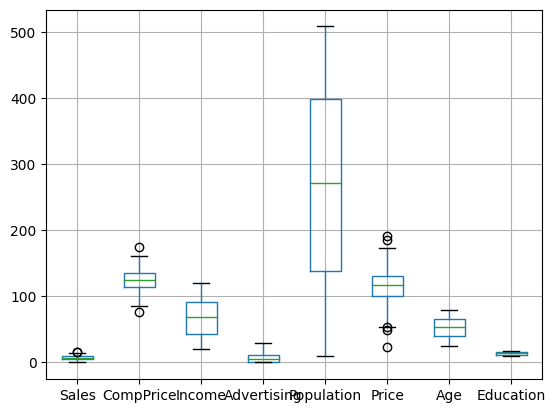

In [ ]:
# creating the box plot for sbove variables...
df.boxplot()

In [ ]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
# label encoding the object variables...

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for col in df.select_dtypes(include = ['object']):
  LE.fit(df[col])

  df[col] = LE.transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [ ]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [ ]:
# Data Partition..

from sklearn.model_selection import train_test_split

X = df.drop(['Sales'],axis = 1) # dropping unnecessory columns..
Y = df['Sales']

X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.25,random_state=42)

# printing the shape of training and testing data ..

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("Y_train shape:",Y_train.shape)
print("Y_test shape:",Y_test.shape)

X_train shape: (300, 10)
X_test shape: (100, 10)
Y_train shape: (300,)
Y_test shape: (100,)


mean Squared Error: 5.420549000000001


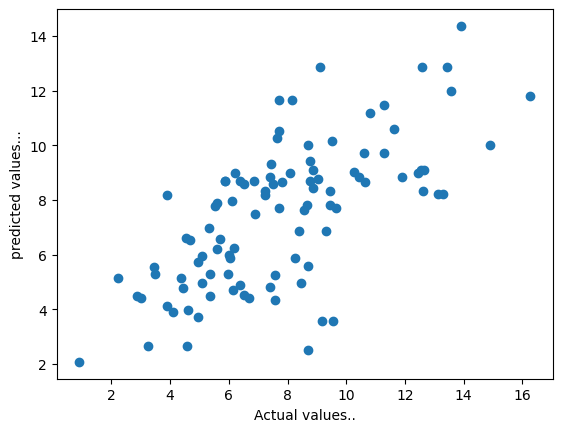

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor object
model = DecisionTreeRegressor()

# model fitting..
model.fit(X_train, Y_train)

#make prediction on test data..
Y_pred = model.predict(X_test)

#Evaluate the model..
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,Y_pred)
print("mean Squared Error:",mse)

# plot the results..

import matplotlib.pyplot as plt

plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual values..")
plt.ylabel("predicted values...")
plt.show()

In [ ]:
# cross validation....

from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()

from sklearn.model_selection import train_test_split
training_error = []
testing_error = []

for i in range(1,101):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)
  DTR.fit(X_train,Y_train)
  Y_pred_train = DTR.predict(X_train)
  Y_pred_test = DTR.predict(X_test)
  training_error.append(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
  testing_error.append(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))


print("Cross validation training error:", np.mean(training_error).round(2))
print("Cross validation testing error:", np.mean(testing_error).round(2))

Cross validation training error: 0.0
Cross validation testing error: 2.29


In [ ]:
# printing the nodes and depth of the tree....

print("The numbver of nbodes in the tree",DTR.tree_.node_count)
print("The depth of tree is :",DTR.tree_.max_depth)

The numbver of nbodes in the tree 547
The depth of tree is : 15


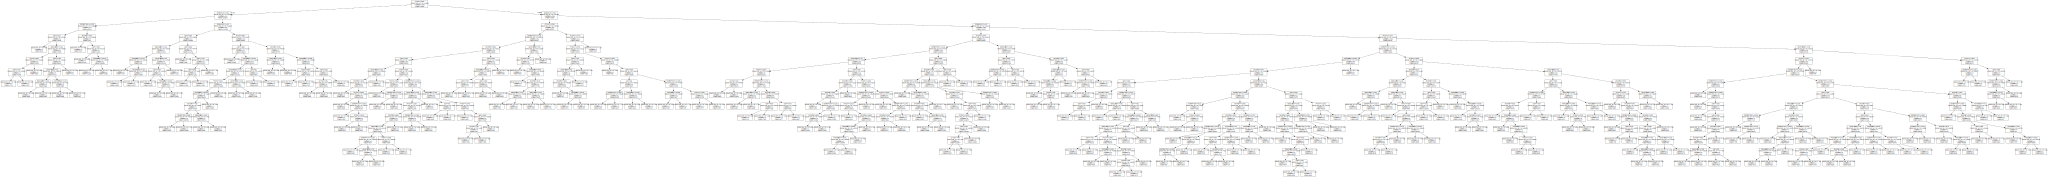

In [ ]:
# printing the decission tree graph..

!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(DTR, out_file=None, feature_names=X.columns)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Bagging regressor..

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state=0)

from sklearn.ensemble import BaggingRegressor
training_error = []
test_error = []

# creating the BaggingRegressor with 10 estimators..
bag_R = BaggingRegressor(
    estimator= DecisionTreeRegressor(max_depth=8),
    n_estimators=100,
    max_features = 0.7, max_samples = 0.6) #max_depth tried on different values
#max_depth=11 train error = 1.02  , test error =  1.68
#max_depth=10 train error = 0.99 , test error =  1.62
#max_depth=9 train error = 1.02 , test error =  1.63
#max_depth=8 train error = 1.08  , test error = 1.6
#max_depth=12 train error = 1  , test error =  1.66
# Fit the model to the training data
bag_R.fit(X_train, Y_train)

# Predict the labels for the training and test data
Y_pred_train_bag = bag_R.predict(X_train)
Y_pred_test_bag = bag_R.predict(X_test)

# Calculate the accuracy for the training and test data
training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train_bag)))
test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test_bag)))

print("Cross validation Training error: ", np.mean(training_error).round(2))
print("Cross validation Test error: ", np.mean(test_error).round(2))


Cross validation Training error:  1.12
Cross validation Test error:  1.71


In [ ]:
from sklearn.model_selection import train_test_split
training_error = []
test_error = []

for i in range(1,501):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state = i)
  bag_R.fit(X_train,Y_train)
  Y_pred_train = bag_R.predict(X_train)
  Y_pred_test = bag_R.predict(X_test)
  training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
  test_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))

print("cross validation training score:",np.mean(training_error).round(2))
print("cross validation testing error:",np.mean(test_error).round(2))



cross validation training score: 1.08
cross validation testing error: 1.08


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

training_error = []
test_error = []
# Create a RandomForestRegressor with 100 estimators
RF_R = RandomForestRegressor(n_estimators=100, max_features = 0.7, max_samples = 0.6)
# Fit the model to the training data
RF_R.fit(X_train, Y_train)

# Predict the labels for the training and test data
Y_pred_train_RF = RF_R.predict(X_train)
Y_pred_test_RF = RF_R.predict(X_test)

# Calculate the accuracy for the training and test data
training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train_RF)))
test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test_RF)))

print("Cross validation Training error: ", np.mean(training_error).round(2))
print("Cross validation Test error: ", np.mean(test_error).round(2))


training_error = []
test_error = []
for i in range(1,501):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    RF_R.fit(X_train,Y_train)
    Y_pred_train = RF_R.predict(X_train)
    Y_pred_test = RF_R.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))

print("Cross validation Training score: ", np.mean(training_error).round(2))
print("Cross validation Test score: ", np.mean(test_error).round(2))


Cross validation Training error:  0.91
Cross validation Test error:  1.54
Cross validation Training score:  0.92
Cross validation Test score:  0.92


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [0.7, 0.8, 0.9],
    'learning_rate': [0.01,0.1,0.5,1]}

# Create a BaggingClassifier instance
GB_reg = GradientBoostingRegressor()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(GB_reg, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, Y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict the labels for the test data using the best model
Y_pred_train = best_model.predict(X_train)
Y_pred_test = best_model.predict(X_test)

# Calculate the accuracy of the best model
test_error = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
train_error = np.sqrt(mean_squared_error(Y_train, Y_pred_train))

# Print the accuracy of the best model
print("Train error (best model):", train_error)
print("Test error (best model):", test_error)


Best parameters: {'learning_rate': 0.1, 'max_features': 0.7, 'n_estimators': 200}
Train error (best model): 0.4360869247347447
Test error (best model): 1.2569413041243194


In [ ]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
dt_model = AdaBoostRegressor(n_estimators=200,learning_rate=0.01)

training_error = []
test_error = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("Ada Boosting-Cross validation Training error: ", np.mean(training_error).round(2))
print("Ada Boosting-Cross validation Test error: ", np.mean(test_error).round(2))

Ada Boosting-Cross validation Training error:  1.72
Ada Boosting-Cross validation Test error:  1.97


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
dt_model = XGBRegressor(gamma=50,reg_lambda=20,n_estimators=100)

In [ ]:
training_error = []
test_error = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("xgb-Cross validation Training error: ", np.mean(training_error).round(2))
print("xgb-Cross validation Test error: ", np.mean(test_error).round(2))

xgb-Cross validation Training error:  1.79
xgb-Cross validation Test error:  1.96
